<a href="https://colab.research.google.com/github/David-dmh/Warehouse-Data-Analysis/blob/main/Data_Cleaning_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Set-Up (R):

In [1]:
install.packages("googledrive")
library("googledrive")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gargle’




In [2]:
drive_auth(
  email = gargle::gargle_oauth_email(),
  path = NULL,
  scopes = "https://www.googleapis.com/auth/drive",
  cache = gargle::gargle_oauth_cache(),
  use_oob = gargle::gargle_oob_default(),
  token = NULL
)

ERROR: ignored

In [3]:
# Check if is running in Colab and redefine is_interactive()
if (file.exists("/usr/local/lib/python3.6/dist-packages/google/colab/_ipython.py")) {
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  options(rlang_interactive=TRUE)
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.24.0 (2020-08-26 16:11:58 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.10.1 (2020-08-26 22:50:31 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, inherits, isOpen, nullfile, parse,
    warnings




In [4]:
drive_auth(use_oob = TRUE, cache = TRUE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/auth?client_id=603366585132-0l3n5tr582q443rnomebdeeo0156b2bc.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code



Enter authorization code: 4/1AY0e-g49tJroOdB2zzpAmq7uB47DdU6XWK52RrGtSitG9CPdd1NDvwKiodw


Data Cleaning:

In [5]:
# importing data as .csv
data <- read.csv("ValueAddedActivities.csv", skip=1)
colnames(data)[4:20] <- paste(colnames(data)[4:20], "2010", sep="_")
colnames(data)[21:54] <- paste(colnames(data)[21:54], "2011", sep="_")
head(data)

,AREA,INDICATORS,UOM,W36_2010,W37_2010,W38_2010,W39_2010,W40_2010,W41_2010,W42_2010,⋯,W32_2011,W33_2011,W34_2011,X,SUM,AVG,X.1,X.2,X.3,X.4
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Inbound,Number of trucks arrived,truck,97,113,88,76,120,100,105,⋯,125,123,123,NA,"5,283",103.59,,,,
2,,Number of purchase orders handled,purchase order,943,1135,1009,732,741,1059,1056,⋯,1437,1491,1788,NA,"60,116","1,178.75",,,,
3,,Normal PO,purchase order,810,953,821,642,659,938,919,⋯,1135,1186,1430,NA,"50,221",984.73,,,,
4,,VMI and other PO,purchase order,133,182,188,90,82,121,137,⋯,302,305,358,NA,"9,895",194.02,,,,
5,,Number of purchase receipts handled,PO line,1328,1568,1524,1220,1293,1608,1716,⋯,2214,1925,2472,NA,"85,951","1,685.31",,,,
6,,Receipt (+),PO line,1311,1568,1508,1219,1289,1604,1690,⋯,2206,1918,2468,NA,"85,345","1,673.43",,,,


In [6]:
data <- subset(data, select=-c(X, X.1, X.2, X.3, X.4))
head(data)

,AREA,INDICATORS,UOM,W36_2010,W37_2010,W38_2010,W39_2010,W40_2010,W41_2010,W42_2010,⋯,W27_2011,W28_2011,W29_2011,W30_2011,W31_2011,W32_2011,W33_2011,W34_2011,SUM,AVG
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,Inbound,Number of trucks arrived,truck,97,113,88,76,120,100,105,⋯,88,109,100,107,94,125,123,123,"5,283",103.59
2,,Number of purchase orders handled,purchase order,943,1135,1009,732,741,1059,1056,⋯,1284,1155,1293,1451,1363,1437,1491,1788,"60,116","1,178.75"
3,,Normal PO,purchase order,810,953,821,642,659,938,919,⋯,1036,928,1006,1142,1095,1135,1186,1430,"50,221",984.73
4,,VMI and other PO,purchase order,133,182,188,90,82,121,137,⋯,248,227,287,309,268,302,305,358,"9,895",194.02
5,,Number of purchase receipts handled,PO line,1328,1568,1524,1220,1293,1608,1716,⋯,1573,1552,1824,3121,2605,2214,1925,2472,"85,951","1,685.31"
6,,Receipt (+),PO line,1311,1568,1508,1219,1289,1604,1690,⋯,1572,1544,1810,3117,2593,2206,1918,2468,"85,345","1,673.43"


In [7]:
# need to create dataframes for each AREA, will make plotting easier
# for: inbound, WHS_bldg, whs_to_production, whs_other, outbound, production_mat_flow
which(data$AREA != "")

inbound <- data[1:16, ]
WHS_bldg <- data[17:32, ]
whs_to_production <- data[33:43, ]
whs_other <- data[44:49, ]
outbound <- data[50:57, ]
production_mat_flow <- data[58:62, ]

[1]  1 17 33 44 50 58

In [80]:
No_of_trucks_arrived_2010

[1]  97 113  88  76 120 100 105 107  79  95 116 119 102 111 113  88  23

In [85]:
colnames(inbound)[1]

[1] "AREA"

In [88]:
abc <- sapply(seq(from=4, to=length(No_of_trucks_arrived_2010), by=1),function(x)colnames(inbound)[x])
abc

[1] "W36_2010" "W37_2010" "W38_2010" "W39_2010" "W40_2010" "W41_2010"
 [7] "W42_2010" "W43_2010" "W44_2010" "W45_2010" "W46_2010" "W47_2010"
[13] "W48_2010" "W49_2010"

In [101]:
# index for subsetting 2010 names
test1 <- seq(from=which(names(inbound) == "W36_2010"), to=which(names(inbound) == "W52_2010"), by=1)
length(test1)

[1] 17

In [102]:
test2 <- sapply(seq(from=which(names(inbound) == "W36_2010"), to=which(names(inbound) == "W52_2010"), by=1), function(x)colnames(inbound)[x])
length(test2)

[1] 17

In [96]:
# index for subsetting 2011 names
seq(from=which(names(inbound) == "W01_2011"), to=which(names(inbound) == "W34_2011"), by=1)

[1] 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45
[26] 46 47 48 49 50 51 52 53 54

In [97]:
sapply(seq(from=which(names(inbound) == "W01_2011"), to=which(names(inbound) == "W34_2011"), by=1), function(x)colnames(inbound)[x])

[1] "W01_2011" "W02_2011" "W03_2011" "W04_2011" "W05_2011" "W06_2011"
 [7] "W07_2011" "W08_2011" "W09_2011" "W10_2011" "W11_2011" "W12_2011"
[13] "W13_2011" "W14_2011" "W15_2011" "W16_2011" "W17_2011" "W18_2011"
[19] "W19_2011" "W20_2011" "W21_2011" "W22_2011" "W23_2011" "W24_2011"
[25] "W25_2011" "W26_2011" "W27_2011" "W28_2011" "W29_2011" "W30_2011"
[31] "W31_2011" "W32_2011" "W33_2011" "W34_2011"

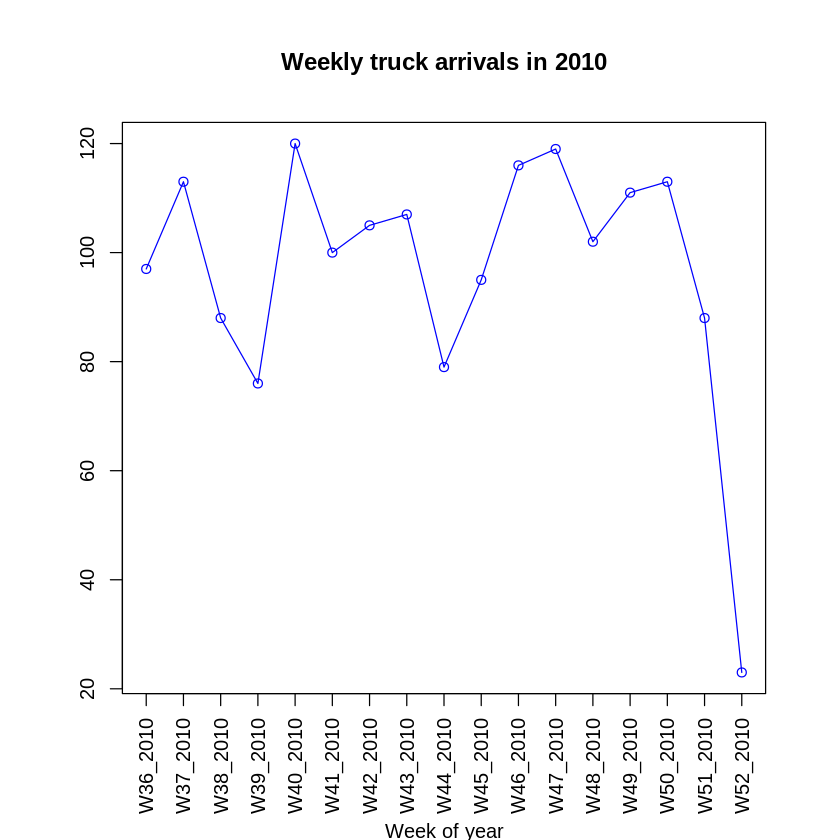

In [117]:
No_of_trucks_arrived_2010 <- as.numeric(as.vector(inbound[1, 5:which(names(inbound) == "W01_2011")-1]))
No_of_trucks_arrived_2011 <- as.numeric(as.vector(inbound[1, which(names(inbound) == "W01_2011"):which(names(inbound) == "W34_2011")]))

# lines(No_of_trucks_arrived_2011, type="o", col="red")
par(mar=c(6.1, 5.1, 5.1, 3.1), mgp=c(5.2, 1, 0))
plot(No_of_trucks_arrived_2010, type="o", col="blue", main="Weekly truck arrivals in 2010", xlab="Week of year", 
ylab="Number of trucks arrived", xaxt="n")
axis(1, at=1:length(test1), test2, las=2)